## Plotting Software to display comparisons between ray-tracing results and predictions of various geolocation and refractive index determination techniques.

## The software requires that you have a folder identified as "ray_data" on your desktop and that the output "data.csv" file is stored into this folder. 

In [1]:
%pylab inline
import pandas as pd
import glob
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#fl = '/home/w2naf/Desktop/ray_data/bks_b3_f10_20120921_2-14.csv'
df = None
home_dir = os.getenv('HOME')
files = glob.glob(home_dir+'/Desktop/ray_data/*.csv')
for fl in files:
    print 'Loading file {fl}'.format(fl=fl)
    if df is None:
        df = pd.DataFrame.from_csv(fl)
    else:
        df_tmp = pd.DataFrame.from_csv(fl)
        df = df.append(df_tmp, ignore_index=True)

Loading file /home/ray/Desktop/ray_data/data.csv


In [4]:
#df.info()

In [5]:
df.tail(-500)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p,bearing,bx,by,bz,B,b_kx,b_kz,dip,hv_sm,th_sm,lgc_sm,hv_cm,th_cm,lgc_cm,lgc_diff_2p,lgc_diff_sm,lgc_diff_cm,nr_diff_2p,elv_init_select
500,5,15.1,1455000,10000,63.613846,-100.703835,0.931552,6701357.5,sas,8.178065,0.207852,2012-09-20 04:00:00,19.286411,1324.224750,330.3575,516.522561,0.205399,1312.200318,0.934482,1,63.378077,-99.764618,20.752258,6262.205254,358.893444,49592.251636,49987.352815,0.119692,0.992096,83.120764,350,0.216245,1377.695087,508.533720,0.206281,1314.214723,12.024432,-53.470336,10.010027,-0.002929,NaN
501,5,15.0,915000,10000,59.484272,-103.029648,0.943550,6634084.0,sas,9.965199,0.133140,2012-09-20 04:00:00,19.131357,848.237394,263.0840,295.664768,0.132965,850.723199,0.940197,1,59.464354,-102.657615,18.210138,8135.415279,1027.672775,49132.602283,49812.184254,0.161589,0.986357,80.696200,350,0.129286,823.680622,372.837201,0.127565,812.718437,-2.485806,24.556772,35.518957,0.003353,NaN
502,5,15.0,925000,10000,59.561623,-102.988815,0.942260,6636660.0,sas,9.604721,0.134539,2012-09-20 04:00:00,19.134079,857.145458,265.6600,299.517060,0.134349,859.539594,0.940067,1,59.539661,-102.608738,18.252253,8097.864677,1015.277884,49145.728500,49818.759833,0.160751,0.986490,80.744854,350,0.130942,834.230717,374.388653,0.129118,822.610311,-2.394136,22.914740,34.535147,0.002192,NaN
503,5,15.0,935000,10000,59.638927,-102.947922,0.941055,6639202.0,sas,9.256236,0.135936,2012-09-20 04:00:00,19.136805,866.049249,268.2020,303.382112,0.135731,868.345794,0.939939,1,59.614864,-102.559699,18.294539,8060.413537,1002.880381,49158.663255,49825.196522,0.159915,0.986623,80.793364,350,0.132595,844.762340,375.976386,0.130666,832.474081,-2.296545,21.286909,33.575169,0.001117,NaN
504,5,15.0,945000,10000,59.716175,-102.906952,0.939933,6641600.5,sas,8.922596,0.137333,2012-09-20 04:00:00,19.139537,874.948959,270.6005,307.259900,0.137111,877.141784,0.939811,1,59.689960,-102.510498,18.336999,8023.062486,990.480472,49171.407501,49831.495050,0.159082,0.986754,80.841730,350,0.134245,855.276198,377.600400,0.132210,842.310339,-2.192826,19.672761,32.638620,0.000121,NaN
505,5,15.0,955000,10000,59.793385,-102.865898,0.938893,6643784.5,sas,8.603746,0.138729,2012-09-20 04:00:00,19.142273,883.844776,272.7845,311.150404,0.138491,885.927549,0.939685,1,59.764951,-102.461133,18.379633,7985.812148,978.078363,49183.962194,49837.656145,0.158251,0.986884,80.889953,350,0.135893,865.772961,379.260695,0.133750,852.119642,-2.082773,18.071815,31.725134,-0.000792,15.0
506,5,15.0,1375000,10000,63.012978,-101.062180,0.929347,6686472.0,sas,6.433502,0.196994,2012-09-20 04:00:00,19.262521,1255.045778,315.4720,485.736861,0.194932,1245.515521,0.935257,1,62.816505,-100.229752,20.337457,6519.439517,457.749698,49553.259644,49982.378572,0.125487,0.991415,82.786243,350,0.203557,1296.860895,481.754828,0.195216,1243.722974,9.530257,-41.815117,11.322804,-0.005910,NaN
507,5,15.0,1385000,10000,63.089195,-101.017113,0.929496,6687909.0,sas,6.560368,0.198373,2012-09-20 04:00:00,19.265526,1263.833179,316.9090,490.152899,0.196240,1253.849349,0.935171,1,62.886769,-100.172598,20.388315,6487.009302,445.430465,49558.612587,49983.355024,0.124757,0.991502,82.828350,350,0.205145,1306.978913,484.975206,0.196610,1252.604787,9.983830,-43.145733,11.228393,-0.005675,NaN
508,5,15.0,1395000,10000,63.165417,-100.971939,0.929658,6689370.0,sas,6.693034,0.199752,2012-09-20 04:00:00,19.268537,1272.617732,318.3700,494.580662,0.197546,1262.172442,0.935085,1,62.956919,-100.115243,20.439382,6454.700292,433.116874,49563.820752,49984.228249,0.124031,0.991589,82.870317,350,0.206733,1317.092774,488.231865,0.198001,1261.466566,10.445290,-44.475042,11.151167,-0.005427,NaN
509,5,15.0,1405000,10000,63.241608,-100.926659,0.929834,6690849.0,sas,6.831508,0.201130,2012-09-20 04:00:00,19.271556,1281.399532,319.8490,499.020127,0.198851,1270.484792,0.935001,1,63.026956,-100.057688,20.490661,6422.512799,420.809076,49568

In [6]:
df['lgc_diff_2p'].describe()

count    1.056000e+03
mean     1.905546e-14
std      4.661160e+00
min     -2.056151e+01
25%     -2.606715e+00
50%     -1.982574e+00
75%      1.458927e+00
max      1.313189e+01
Name: lgc_diff_2p, dtype: float64

In [7]:
df['lgc_diff_sm'].describe()

count    1056.000000
mean       -2.104213
std        35.249309
min      -139.697115
25%       -20.615292
50%         6.744899
75%        27.041149
max        34.735135
Name: lgc_diff_sm, dtype: float64

In [8]:
df['lgc_diff_cm'].describe()

count    1056.000000
mean       28.774870
std        19.156061
min         4.451721
25%        11.485785
50%        24.505267
75%        44.523402
max       115.310884
Name: lgc_diff_cm, dtype: float64

In [9]:
df['nr_diff_2p'].describe()

count    1.056000e+03
mean    -1.082888e-17
std      3.086204e-03
min     -7.335595e-03
25%     -1.667658e-03
50%      2.951735e-04
75%      1.980333e-03
max      8.311819e-03
Name: nr_diff_2p, dtype: float64

In [10]:
df['h_2p'].describe()

count    1056.000000
mean      345.067007
std       101.901630
min        88.817478
25%       279.088860
50%       325.855109
75%       412.975914
max       520.225728
Name: h_2p, dtype: float64

In [33]:
bins = np.arange(-202.5, 202.5,5)

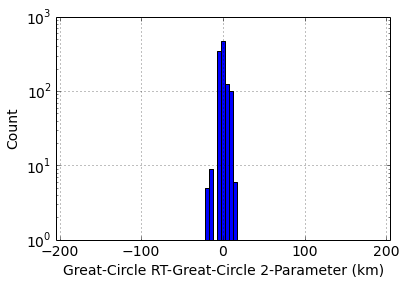

In [34]:
df['lgc_diff_2p'].hist(bins=bins, log=True)
rcParams.update({'font.size':14})
plt.xlim(-205, 205)
plt.ylim(1,1000)
plt.xlabel('Great-Circle RT-Great-Circle 2-Parameter (km)')
plt.ylabel('Count')

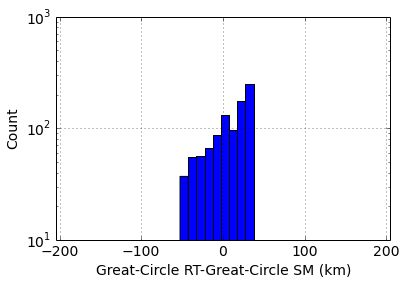

In [31]:
df['lgc_diff_sm'].hist(bins=bins, log=True)
plt.xlim(-205, 205)
plt.xlabel('Great-Circle RT-Great-Circle SM (km)')
plt.ylabel('Count')

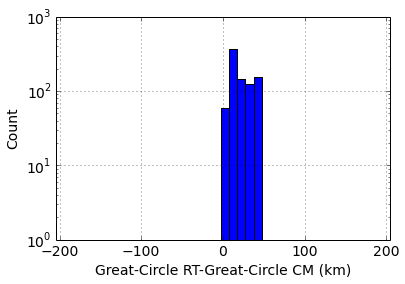

In [32]:
df['lgc_diff_cm'].hist(bins=bins, log=True)
plt.xlim(-205, 205)
plt.ylim(1, 1000)
plt.xlabel('Great-Circle RT-Great-Circle CM (km)')
plt.ylabel('Count')

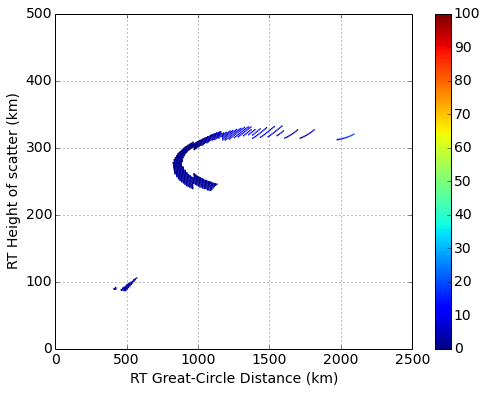

In [15]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

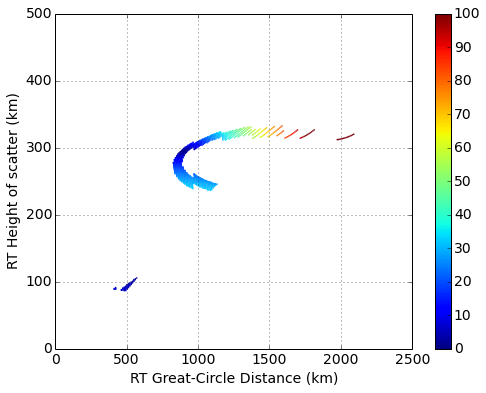

In [16]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Standard Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_sm'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

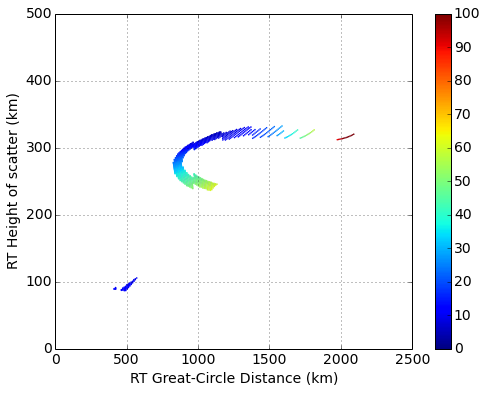

In [17]:
#This plot displays the differences between the predictions of great-circle distance to scatter from 
#the Chisham Method and the results of ray tracing. note that the difference scale ranges from {0, 100 km}.

xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['lgc_diff_cm'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0, vmax=100) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Height of scatter (km)')
ax.grid()

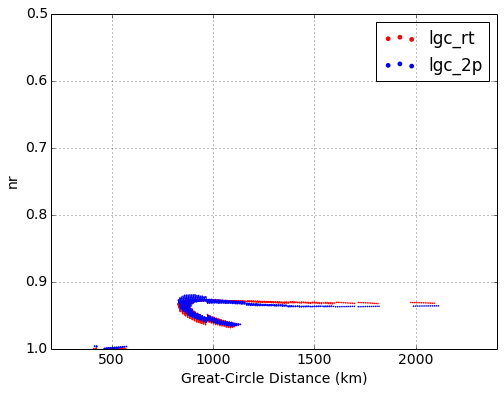

In [18]:
xvar = df['lgc_rt']
xvar1 = df['lgc_2p']
yvar = df['nr']
yvar1 = df['nr_2p']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c='red', s=10, marker='.', edgecolor='none', label='lgc_rt')
scat = ax.scatter(xvar1, yvar1, c='blue', s=10, marker='.', edgecolor='none', label='lgc_2p') 
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(200, 2400)
ax.set_ylim(1, 0.5)
ax.set_ylabel ('nr')
ax.grid()
ax.legend(loc='upper right', markerscale=3)

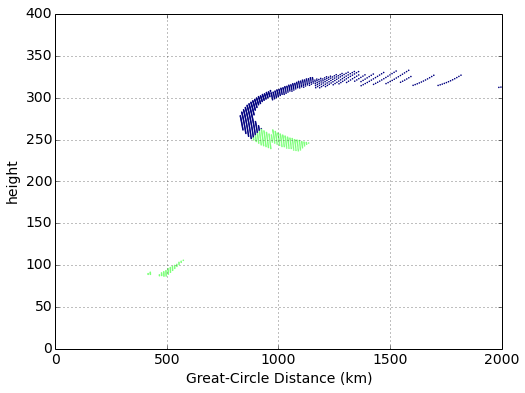

In [19]:
xvar = df['lgc_2p']
yvar = df['height']
color = df['phase']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c= color, s=10, marker='.', edgecolor='none', vmin=1, vmax=3)
#plt.colorbar(scat)
ax.set_xlabel ('Great-Circle Distance (km)')
ax.set_xlim(0, 2000)
ax.set_ylim(0, 400)
ax.set_ylabel ('height')
ax.grid()
#Blue dots represent Phase 1 rays: penetrating rays that have have one scatter region.
#green dots represent Phase 2 rays: reflected rays that can backscatter in the bottomside
            #E-layer and F-layer before being reflected by the ionosphere. These are
            #the only rays capable of 1 1/2 hop backscatter.

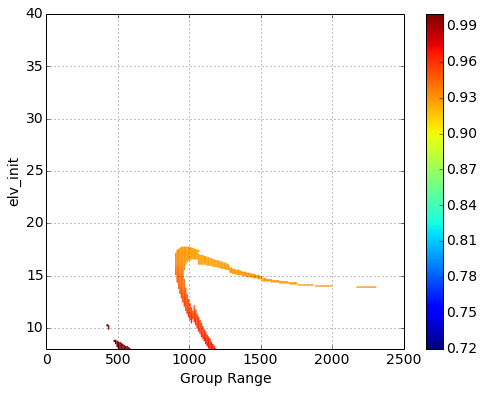

In [20]:
xvar = df['gran']/1000.
yvar = df['elv_init']
color = df['nr']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.72, vmax=1.0) 
plt.colorbar(scat)
ax.set_xlabel ('Group Range')
ax.set_xlim(0, 2500)
ax.set_ylim(8, 40)
ax.set_ylabel ('elv_init')
ax.grid()

In [21]:
df['lgc_diff_2p'].describe()

count    1.056000e+03
mean     1.905546e-14
std      4.661160e+00
min     -2.056151e+01
25%     -2.606715e+00
50%     -1.982574e+00
75%      1.458927e+00
max      1.313189e+01
Name: lgc_diff_2p, dtype: float64

In [22]:
df['nr_diff_2p'].describe()

count    1.056000e+03
mean    -1.082888e-17
std      3.086204e-03
min     -7.335595e-03
25%     -1.667658e-03
50%      2.951735e-04
75%      1.980333e-03
max      8.311819e-03
Name: nr_diff_2p, dtype: float64

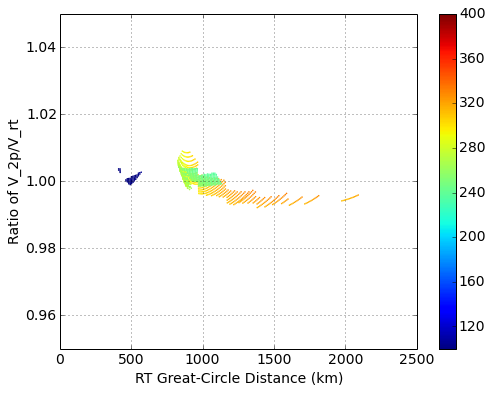

In [23]:
xvar = df['lgc_rt']
yvar = df['nr']/df['nr_2p']
color = df['height']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=100, vmax=400) 
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0.95, 1.05)
ax.set_ylabel('Ratio of V_2p/V_rt')
ax.grid()

In [24]:
bins_nr = np.arange(-.025, .025, .001)

In [25]:
bins_nr

array([ -2.50000000e-02,  -2.40000000e-02,  -2.30000000e-02,
        -2.20000000e-02,  -2.10000000e-02,  -2.00000000e-02,
        -1.90000000e-02,  -1.80000000e-02,  -1.70000000e-02,
        -1.60000000e-02,  -1.50000000e-02,  -1.40000000e-02,
        -1.30000000e-02,  -1.20000000e-02,  -1.10000000e-02,
        -1.00000000e-02,  -9.00000000e-03,  -8.00000000e-03,
        -7.00000000e-03,  -6.00000000e-03,  -5.00000000e-03,
        -4.00000000e-03,  -3.00000000e-03,  -2.00000000e-03,
        -1.00000000e-03,   2.08166817e-17,   1.00000000e-03,
         2.00000000e-03,   3.00000000e-03,   4.00000000e-03,
         5.00000000e-03,   6.00000000e-03,   7.00000000e-03,
         8.00000000e-03,   9.00000000e-03,   1.00000000e-02,
         1.10000000e-02,   1.20000000e-02,   1.30000000e-02,
         1.40000000e-02,   1.50000000e-02,   1.60000000e-02,
         1.70000000e-02,   1.80000000e-02,   1.90000000e-02,
         2.00000000e-02,   2.10000000e-02,   2.20000000e-02,
         2.30000000e-02,

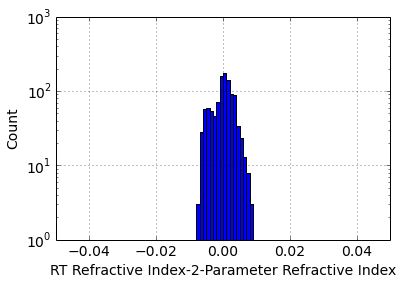

In [26]:
df['nr_diff_2p'].hist(bins=bins_nr, log=True)
plt.xlim(-.05, .05)
plt.xlabel('RT Refractive Index-2-Parameter Refractive Index')
plt.ylabel('Count')

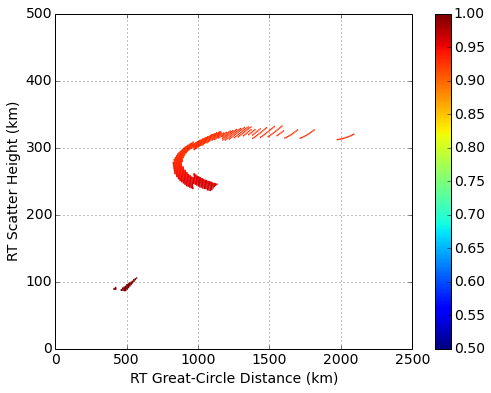

In [27]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin=0.5, vmax=1.0)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()

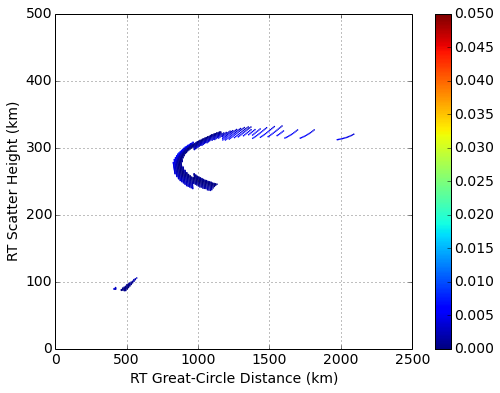

In [28]:
xvar = df['lgc_rt']
yvar = df['height']
color = np.abs(df['nr_diff_2p'])
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(xvar, yvar,'.', ms = .1)
scat = ax.scatter(xvar, yvar, c=color, s=10, marker='.', edgecolor='none', vmin= 0., vmax=0.05)
plt.colorbar(scat)
ax.set_xlabel ('RT Great-Circle Distance (km)')
ax.set_xlim(0, 2500)
ax.set_ylim(0, 500)
ax.set_ylabel ('RT Scatter Height (km)')
ax.grid()